#### Importing packages

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly as py
import plotly.express as px
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,recall_score, precision_score

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Functions

In [2]:
# Function to remove missing values above a given threshold
def missing_remove(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold].tolist()
    print(f"# Features deleted with more than {threshold} % missing values", len(columns))
    return dataframe.drop(columns, axis=1,inplace=True)

In [3]:
# Function to remove features with unique values
def unique_remove(dataframe):
    unique_features = []
    for col in dataframe.columns:
        if(dataframe[col].unique().size == 2):
            if(len(unique_features) == 0):
                unique_features =  dataframe[col]
            else:
                 unique_features = pd.concat([unique_features, dataframe[col]], axis=1)
            dataframe.drop(col, axis=1, inplace=True)

In [4]:
# Function to remove outlier
def outlier_detection_zcore(dataframe):
    data_mean, data_std  = dataframe.mean(), dataframe.std()
    data_z_scores = ((dataframe - data_mean) / data_std).abs()
    m = data_z_scores > 3
    dataframe = dataframe.mask(m,inplace=True)
    return dataframe

In [5]:
def rfc(X_train_rfc,X_test_rfc,y_train,max_depth):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)
  model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=max_depth)
  model.fit(X_train_rfc, y_train)
  y_pred = model.predict(X_test_rfc)
  #sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])
  print(classification_report(y_test, y_pred))
  print("Test Accuracy Score", accuracy_score(y_test, y_pred))
  print("Train Accuracy Score", accuracy_score(y_train, model.predict(X_train_rfc)))
  print("F1 Score",f1_score(y_test, y_pred, average='micro'))
  print("MC Score",matthews_corrcoef(y_test, y_pred))
  #create ROC curve
  y_pred_proba = model.predict_proba(X_test_rfc)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label='Random Forest Classifier (AUC = %0.2f)' % auc)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([-0.01, 1.0])
  plt.ylim([0.0, 1.05])
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")

In [6]:
def evaluate2(model, X_train,X_test,y_train,y_test):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
  X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  model.fit(X_train_std, y_train)
  y_pred = model.predict(X_test_std)
  cm=confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d",cmap="YlOrRd",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])
  #print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test_std, y_test, ax=ax, alpha=0.8)
  print("Model Name:", model)
  print("Train Accuracy Score:", accuracy_score(y_train, model.predict(X_train_std)))
  print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
  f1score = f1_score(y_test, y_pred, average='micro')
  mccscore=matthews_corrcoef(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  specificity = cm[1,1]/(cm[1,1]+cm[0,1])
  sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
  FNR = cm[1,0]/(cm[1,0]+cm[0,0])
  FPR = cm[0,1]/(cm[0,1]+cm[1,1])
  specificity1 = 1 - FPR
  sensitivity1 = 1- FNR
  print("F1 Score:", f1score) 
  print("MC Score:" , mccscore)
  print("Sensitivity:" , sensitivity)
  print("Specificity:" , specificity)
  print("Recall:" , recall)
  print("Precision:" , precision)
  print("FNR:" , FNR)
  print(f"FPR: {FPR}\n" )
  #print("Sensitivity1:" , sensitivity1)
  #print("Specificity1:" , specificity1)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, matthews_corrcoef
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
def evaluate(train_df, test_df, train_target, test_target):
    
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    logreg = LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear')
    logreg.fit(train_std, train_target.values.ravel())
    
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
   
    cm = ConfusionMatrix(logreg, classes=['Fail', 'Pass'], cmap="YlGn", size=(400,400))
    cm.score(test_std, y_true)
    cm.show()
    from matplotlib.pyplot import figure
    figure(figsize=(5, 5), dpi=80)
    ax = plt.gca()
    plot = plot_roc_curve(logreg, test_df, test_target, ax=ax, alpha=0.8)
    
    return f1score, mccscore

#### Importing and basic cleaning

In [8]:
# Importing data from internet in runtime
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [9]:
# Assigning data to a pandas dataframe
secom_data = pd.read_csv(data_url,sep=' ',header=None)

In [10]:
# Renaming the columns 
secom_data.columns = ["Feature_"+str(column+1) for column in range(len(secom_data.columns))]
secom_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [11]:
# Importing target data from internet in runtime
label_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [12]:
# Assigning target data to a pandas dataframe
secom_labels = pd.read_csv(label_url, sep = " ",header=None)

In [13]:
# Renaming the columns 
secom_labels.columns = ["Classification","Timestamp"]

In [14]:
# Changing datatype for consitency
secom_labels['Timestamp'] = pd.to_datetime(secom_labels['Timestamp'],errors='raise')

In [15]:
# Merging the data
data= pd.concat([secom_labels,secom_data],axis=1)

In [16]:
# Dropping the timestamp column as it provides no insights
data.drop(columns="Timestamp", errors='raise',inplace=True)

In [17]:
target = data[['Classification']]
data.drop(['Classification'], axis=1,inplace=True)

#### Spliting the data into training set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.20, random_state=42, stratify=target)
# We use the startify parameter as the data is imbalanced on the basis of pass and fail and this will ensure the same 
#is retained when we split - Random state will help us create a reproducible data - Test size is the split ration

In [19]:
X_test_original = X_test

#### Re-labeling the Target values


In [20]:
# # Relabeling target variables 1 is pass and 0 is fail
# y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
# y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [21]:
# # Scaling the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Decision : Removing columns with more that 50% missing values

In [22]:
X_train.shape

(1253, 590)

In [23]:
X_train_missing = X_train
missing_remove(X_train_missing, 0.5)
X_train_missing.shape

# Features deleted with more than 0.5 % missing values 32


(1253, 558)

In [24]:
# From test set deleting columns that are removed in training set
X_test_missing = X_test[np.array(X_train_missing.columns)]
X_test_missing.shape

(314, 558)

# Decision : Replacing outliers with 3s boundary

##### Other option of removing outliers and replacing them has been explored in file "Base file - removing outliers and replacing with knn.ipynb"

In [25]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val

In [26]:
# replace with 3s in X_train
for col in X_train_missing.columns:
    mean = X_train_missing[col].mean()
    std_dev = X_train_missing[col].std(axis=0)
    X_train_missing[col] = X_train_missing[col].map(lambda x: replace_outlier(x, mean, std_dev))

In [27]:
# replace with 3s in X_test
for col in X_test_missing.columns:
    mean = X_test_missing[col].mean()
    std_dev = X_test_missing[col].std(axis=0)
    X_test_missing[col] = X_test_missing[col].map(lambda x: replace_outlier(x, mean, std_dev))

# KNN Imputation

In [28]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_train_missing)
X_train_knn=pd.DataFrame(knn.transform(X_train_missing), columns=X_train_missing.columns)
X_train_knn.isna().sum().sum()

0

In [29]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_test_missing)
X_test_knn=pd.DataFrame(knn.transform(X_test_missing), columns=X_test_missing.columns)
X_test_knn.isna().sum().sum()

0

# Feature Selection

## Lasso - 29 features

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, LogisticRegression

In [31]:
## Selecting features using Lasso
sel_ = SelectFromModel(Lasso(alpha=0.2))
sel_.fit(X_train_knn, y_train)
sel_.get_support()
X_train_knn = pd.DataFrame(X_train_knn)

In [32]:
#To See Selected set of features

selected_feat = X_train_knn.columns[(sel_.get_support())]
print('total features: {}'.format((X_train_knn.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 558
selected features: 46
features with coefficients shrank to zero: 503


In [33]:
#Make a list of with the selected features
removed_feats = X_train_knn.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

X_train_selected = X_train_knn[selected_feat]
X_test_selected = X_test_knn[np.array(X_train_selected.columns)]
X_train_selected.shape, X_test_selected.shape

((1253, 46), (314, 46))

In [34]:
X_train_selected = pd.DataFrame(X_train_selected)
X_test_selected = pd.DataFrame(X_test_selected)
X_train_selected

,Feature_2,Feature_22,Feature_23,Feature_52,Feature_56,Feature_60,Feature_66,Feature_89,Feature_91,Feature_116,...,Feature_488,Feature_489,Feature_490,Feature_500,Feature_501,Feature_511,Feature_512,Feature_522,Feature_562,Feature_590
0,2491.07,-5631.75,2667.50,189.1997,2893.0,-1.8600,27.0072,1776.8803,8505.1801,716.6127,...,115.3218,0.0000,105.8491,551.1811,0.0000,52.7919,620.6897,0.0,19.2044,47.0690
1,2489.47,-5474.25,2997.00,49.2902,2802.0,-8.3955,35.1195,1801.1735,8861.6700,753.7133,...,0.0000,588.0519,538.1757,154.1240,712.0275,59.2058,426.6667,0.0,53.0444,16.6695
2,2524.09,-5438.50,2701.25,204.9855,2846.0,2.1145,26.4123,1871.1087,8793.4601,676.0029,...,117.5251,0.0000,0.0000,0.0000,0.0000,58.4927,283.6364,0.0,82.0961,71.5333
3,2569.45,-5525.00,2691.50,236.2240,2861.0,-3.0882,30.6344,1715.5264,9737.9201,836.6193,...,201.3699,96.1435,245.4971,98.8124,145.1757,50.7463,472.1311,0.0,11.6455,102.5241
4,2466.86,-5544.25,2771.50,203.1767,2864.0,-1.1427,29.0083,1782.0579,9092.5899,691.2983,...,79.2763,871.2195,170.5810,0.0000,0.0000,73.2943,408.7591,0.0,15.5386,21.0599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2504.38,-5664.00,2579.25,213.9730,2868.0,4.9745,46.6654,1767.8010,8641.0299,664.1478,...,54.5876,0.0000,650.7177,0.0000,716.7421,65.9960,381.8182,0.0,20.6779,0.0000
1249,2460.91,-5415.00,2631.50,120.3915,2862.0,4.0991,18.3248,1844.9576,8959.1200,763.4808,...,79.9238,476.6074,136.8263,149.8708,318.0277,27.9509,0.0000,0.0,35.1945,46.4165
1250,2517.35,-6504.75,2244.75,217.0850,2803.0,-2.0991,28.2877,1794.4661,8553.0200,788.3390,...,420.3562,0.0000,98.8593,0.0000,0.0000,40.8889,0.0000,0.0,40.3018,23.6431
1251,2523.21,-5401.75,2672.25,136.6066,2892.0,16.7909,29.5358,1778.9330,9439.4400,837.1784,...,80.0697,862.4176,82.2571,0.0000,0.0000,78.0045,0.0000,0.0,51.1223,293.2614


<AxesSubplot:>

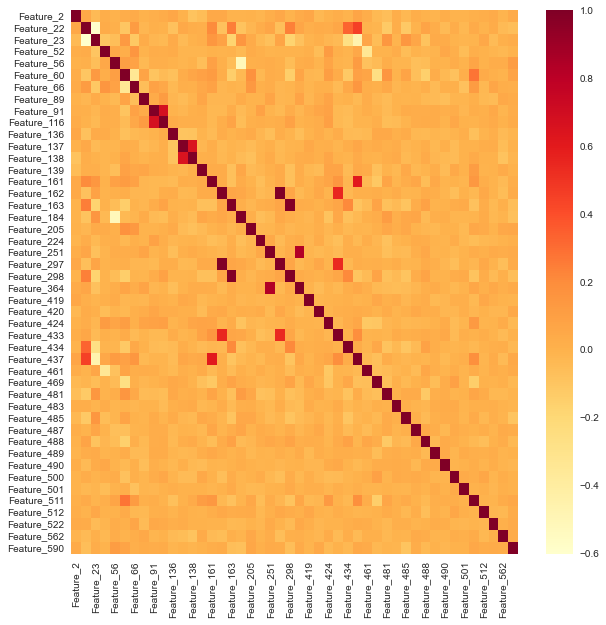

In [35]:
import seaborn as sns
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(X_train_selected.corr(),cmap="YlOrRd")
#plt.title('Heatmap for the Data', fontsize = 30)


#Feature Importance using Random Forest Importance

<AxesSubplot:>

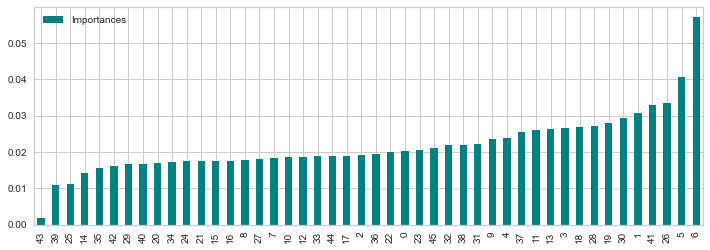

In [36]:
model = RandomForestClassifier()
model.fit(X_train_selected, y_train.values.ravel())
    
feature_selector = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
    
importances = model.feature_importances_
final_df = pd.DataFrame({"Features": pd.DataFrame(X_train_selected).columns, "Importances": importances})
final_df.set_index('Importances')
final_df = final_df.sort_values('Importances')
final_df.plot.bar(color = 'teal',figsize=(12,4))


In [37]:
### BALANCING

In [38]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

In [39]:
from imblearn.combine import SMOTETomek 
# Sampling technique

def Sampling(X_train, y_train, sampler):

    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(random_state=100)    
    
    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100)

    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100, shrinkage=1)
        

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled

In [40]:
# Imbalance treatment
from collections import Counter
X_smote, y_smote = Sampling(X_train_selected, y_train,'SMOTE')

Counter({'Classification': 1})


Model Name: LogisticRegression(C=200, class_weight='balanced', random_state=42,
                   solver='liblinear')
Train Accuracy Score: 0.808974358974359
Test Accuracy Score: 0.732484076433121
F1 Score: 0.7324840764331211
MC Score: 0.07981014444905288
Sensitivity: 0.9446808510638298
Specificity: 0.10126582278481013
Recall: 0.38095238095238093
Precision: 0.10126582278481013
FNR: 0.05531914893617021
FPR: 0.8987341772151899

Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_jobs=-1, random_state=100)
Train Accuracy Score: 0.9658119658119658
Test Accuracy Score: 0.8789808917197452
F1 Score: 0.8789808917197452
MC Score: 0.14525618879275745
Sensitivity: 0.9442508710801394
Specificity: 0.18518518518518517
Recall: 0.23809523809523808
Precision: 0.18518518518518517
FNR: 0.05574912891986063
FPR: 0.8148148148148148

Model Name: SVC()
Train Accuracy Score: 0.9991452991452991
Test Accuracy Score: 0.9140127388535032
F1 Score: 0.914012738

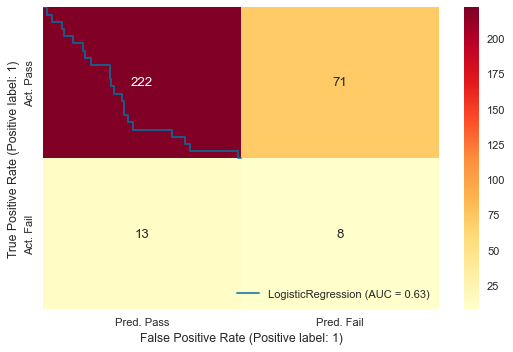

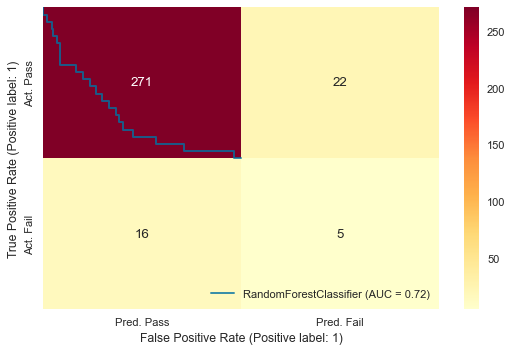

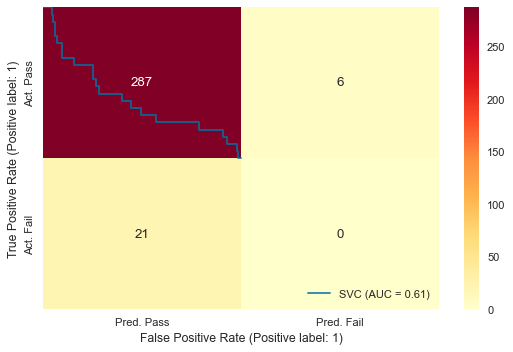

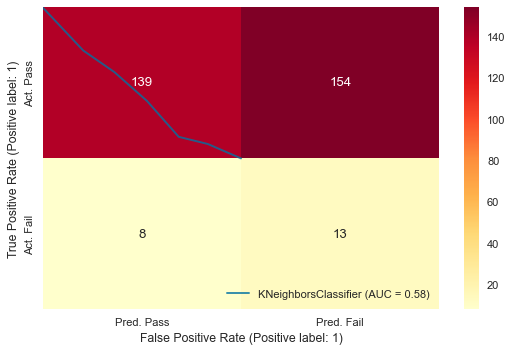

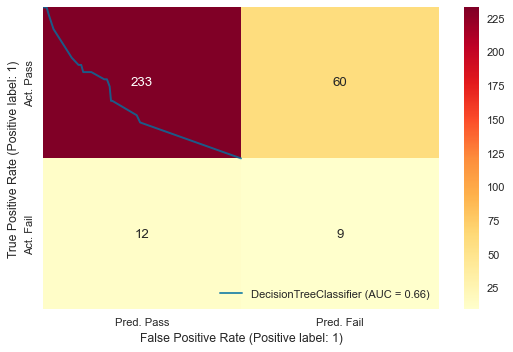

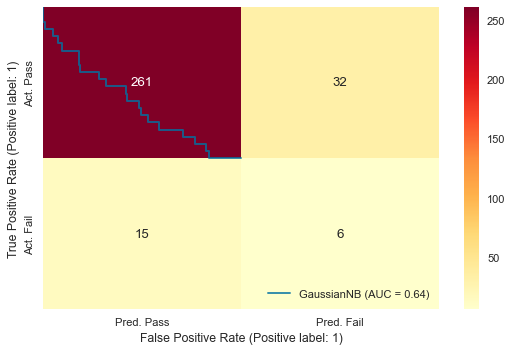

In [43]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

evaluate2(LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),X_smote,X_test_selected,y_smote,y_test)
evaluate2(RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=6, random_state=100),X_smote,X_test_selected,y_smote,y_test)
evaluate2(svm.SVC(),X_smote,X_test_selected,y_smote,y_test)
evaluate2(KNeighborsClassifier(n_neighbors=5),X_smote,X_test_selected,y_smote,y_test)
evaluate2(DecisionTreeClassifier(criterion='entropy', max_depth=6),X_smote,X_test_selected,y_smote,y_test)
evaluate2(GaussianNB(),X_smote,X_test_selected,y_smote,y_test)

## adasyn

In [44]:
# Imbalance treatment
X_adasyn, y_adasyn = Sampling(X_train_selected, y_train,'ADASYN')

Counter({'Classification': 1})


Model Name: LogisticRegression(C=200, class_weight='balanced', random_state=42,
                   solver='liblinear')
Train Accuracy Score: 0.811345079501504
Test Accuracy Score: 0.7356687898089171
F1 Score: 0.7356687898089171
MC Score: 0.05706341503799823
Sensitivity: 0.9411764705882353
Specificity: 0.09210526315789473
Recall: 0.3333333333333333
Precision: 0.09210526315789473
FNR: 0.058823529411764705
FPR: 0.9078947368421053

Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_jobs=-1, random_state=100)
Train Accuracy Score: 0.9707778255264289
Test Accuracy Score: 0.8821656050955414
F1 Score: 0.8821656050955414
MC Score: 0.18462882753286622
Sensitivity: 0.9475524475524476
Specificity: 0.21428571428571427
Recall: 0.2857142857142857
Precision: 0.21428571428571427
FNR: 0.05244755244755245
FPR: 0.7857142857142857

Model Name: SVC()
Train Accuracy Score: 0.9991405242801891
Test Accuracy Score: 0.9140127388535032
F1 Score: 0.914012738

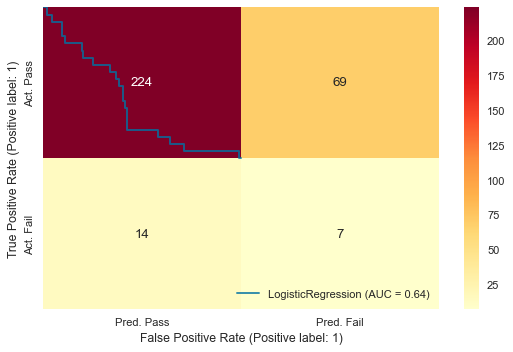

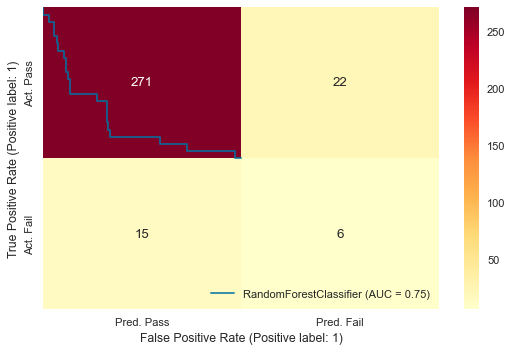

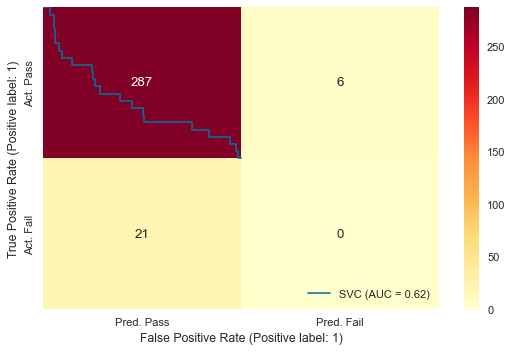

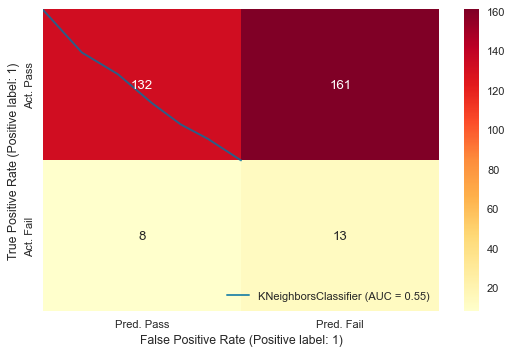

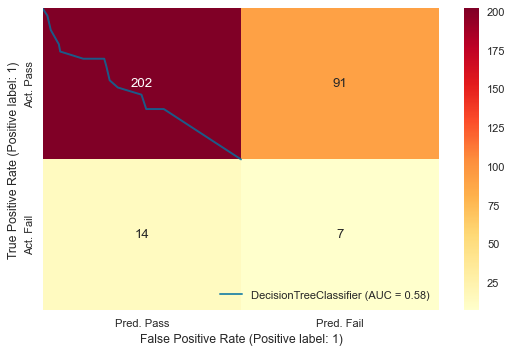

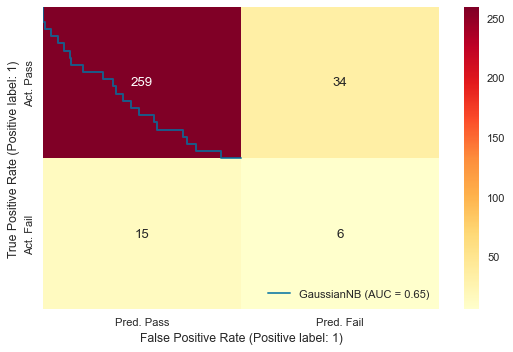

In [45]:
evaluate2(LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),X_adasyn,X_test_selected,y_adasyn,y_test)
evaluate2(RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=6, random_state=100),X_adasyn,X_test_selected,y_adasyn,y_test)
evaluate2(svm.SVC(),X_adasyn,X_test_selected,y_adasyn,y_test)
evaluate2(KNeighborsClassifier(n_neighbors=5),X_adasyn,X_test_selected,y_adasyn,y_test)
evaluate2(DecisionTreeClassifier(criterion='entropy', max_depth=6),X_adasyn,X_test_selected,y_adasyn,y_test)
evaluate2(GaussianNB(),X_adasyn,X_test_selected,y_adasyn,y_test)

## Rose

In [46]:
# Imbalance treatment
X_rose, y_rose = Sampling(X_train_selected, y_train,'ROSE')

Counter({'Classification': 1})


Model Name: LogisticRegression(C=200, class_weight='balanced', random_state=42,
                   solver='liblinear')
Train Accuracy Score: 0.7324786324786324
Test Accuracy Score: 0.7452229299363057
F1 Score: 0.7452229299363057
MC Score: 0.08922089001108004
Sensitivity: 0.9456066945606695
Specificity: 0.10666666666666667
Recall: 0.38095238095238093
Precision: 0.10666666666666667
FNR: 0.05439330543933055
FPR: 0.8933333333333333

Model Name: RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       n_jobs=-1, random_state=100)
Train Accuracy Score: 0.964957264957265
Test Accuracy Score: 0.9331210191082803
F1 Score: 0.9331210191082803
MC Score: 0.0
Sensitivity: 0.9331210191082803
Specificity: nan
Recall: 0.0
Precision: 0.0
FNR: 0.06687898089171974
FPR: nan

Model Name: SVC()
Train Accuracy Score: 0.9769230769230769
Test Accuracy Score: 0.9076433121019108
F1 Score: 0.9076433121019108
MC Score: -0.04328726206963326
Sensitivity: 0.9313725490196079
Specifi

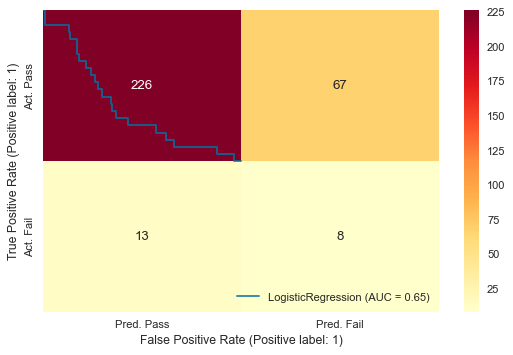

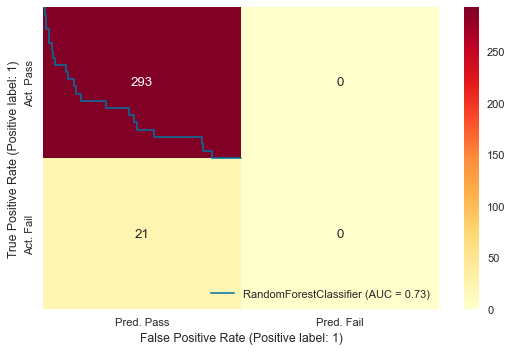

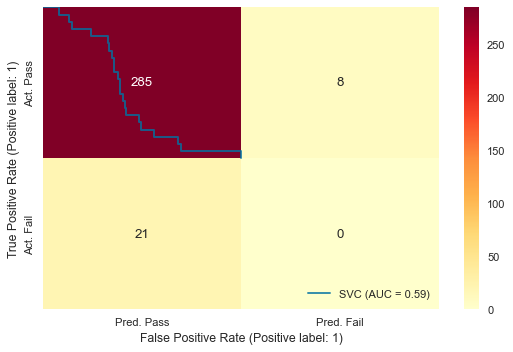

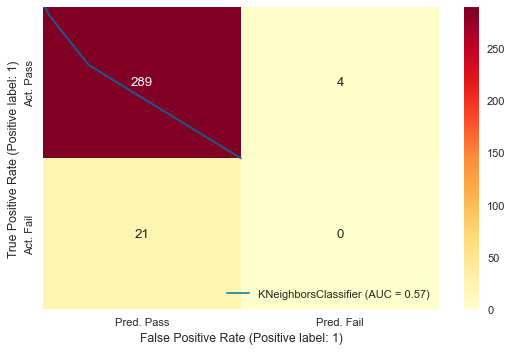

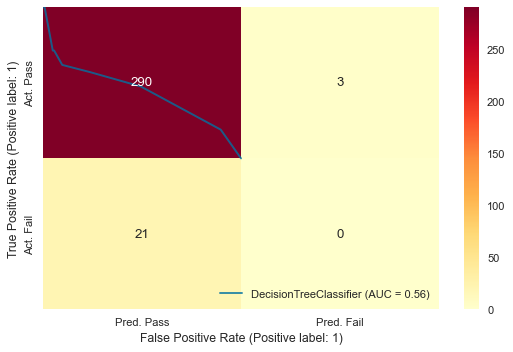

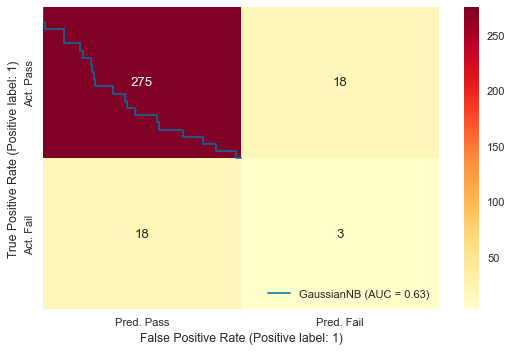

In [47]:
evaluate2(LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),X_rose,X_test_selected,y_rose,y_test)
evaluate2(RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=6, random_state=100),X_rose,X_test_selected,y_rose,y_test)
evaluate2(svm.SVC(),X_rose,X_test_selected,y_rose,y_test)
evaluate2(KNeighborsClassifier(n_neighbors=5),X_rose,X_test_selected,y_rose,y_test)
evaluate2(DecisionTreeClassifier(criterion='entropy', max_depth=6),X_rose,X_test_selected,y_rose,y_test)
evaluate2(GaussianNB(),X_rose,X_test_selected,y_rose,y_test)

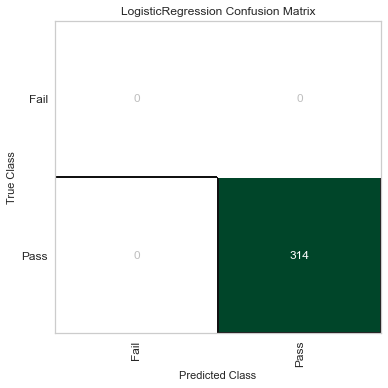

(0.7452229299363057, 0.08922089001108004)

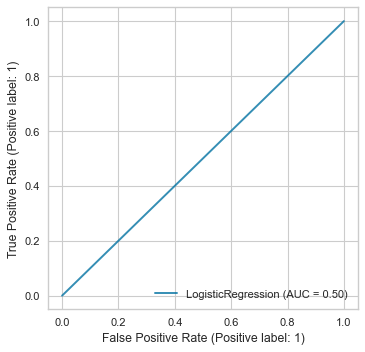

In [48]:
evaluate(X_rose,X_test_selected,y_rose,y_test)

In [49]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]

In [50]:
from sklearn.tree import DecisionTreeClassifier
# evaluate a decision tree for each depth
test_scores=[]
train_scores=[]
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_smotetomek, y_smotetomek)
    # evaluate on the train dataset
    train_yhat = model.predict(X_smotetomek)
    train_acc = accuracy_score(y_smotetomek, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test_selected)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('%d train: %.3f, test: %.3f' % (i, train_acc, test_acc))

NameError: name 'X_smotetomek' is not defined

In [ ]:
import matplotlib
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=80)
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_selected, y_train.values.ravel())
feature_selector = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
figure(figsize=(6, 10), dpi=70)
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train_selected.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")